### Background Project

In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer

**Evaluation**

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
[\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}]
where:

𝑛
 is the total number of instances,
𝑦̂ 𝑖
 is the predicted value of the target for instance (i),
𝑦𝑖
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [34]:
from datetime import datetime as dt

In [312]:
seed = 42

sns.set_style('darkgrid')
sns.set_palette('RdBu')


In [368]:
import warnings

warnings.filterwarnings('ignore')

### Load datset

#### Read the data

In [5]:
train = pd.read_csv("dataset/train.csv")

In [6]:
dataset = ["train", "test", "oil", "holidays_events", "stores", "transactions"]

In [7]:
for data in dataset:
    print(data)
    exec("{} = pd.read_csv('dataset/{}.csv')".format(data, data))

train
test
oil
holidays_events
stores
transactions


#### explore data

#### train data

In [8]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### transactioin data

In [10]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### stores data

In [12]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### oil data

In [14]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [15]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#####  holidays_events data

In [18]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [19]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### EDA

#### Cleaning The data

In [78]:
def index_date(data):
    data["date"] = pd.to_datetime(data["date"])
    return data.set_index("date", inplace=True)


In [29]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [31]:
train.duplicated().sum()

0

In [35]:
train["date"] = pd.to_datetime(train["date"])

In [36]:
train.set_index('date', inplace=True)

In [58]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [79]:
index_date(test)

In [83]:
index_date(transactions)

#### Analysis by sales data

In [59]:
dataset

['train', 'test', 'oil', 'holidays_events', 'stores', 'transactions']

In [62]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [64]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [63]:
satu = train.loc["2013-01-02", :]

In [70]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [68]:
satu[satu["store_nbr"] == 1].shape

(33, 5)

In [55]:
satu.shape

(1782, 5)

In [102]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [106]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [73]:
satu[satu["store_nbr"] == 25].sum()

id                                                         77847
store_nbr                                                    825
family         AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...
sales                                                   5316.224
onpromotion                                                    0
dtype: object

In [23]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [96]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [27]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [42]:
train.groupby([train.index.get_level_values(0), "store_nbr"])["sales"].sum()[]


date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

#### Analysis sale by store

In [113]:
train.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='date', length=3000888)

In [114]:
transactions.index.min(), transactions.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [118]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [137]:
stores.shape

(54, 5)

In [134]:
print(f'there are {stores["cluster"].nunique()} clusters')

there are 17 clusters


In [139]:
stores["type"].value_counts().sort_index()

A     9
B     8
C    15
D    18
E     4
Name: type, dtype: int64

In [155]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

<AxesSubplot: >

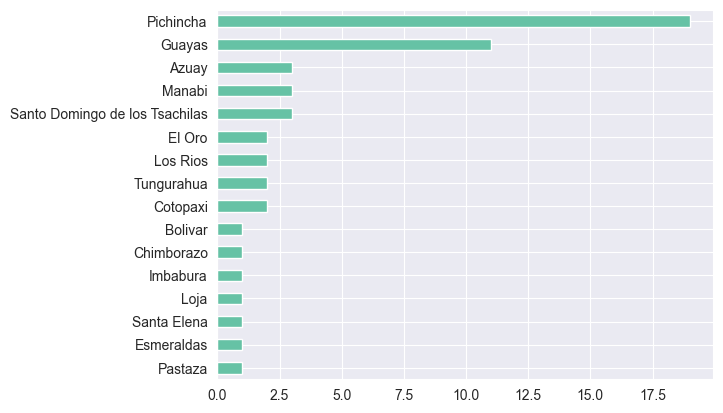

In [151]:
stores["state"].value_counts().sort_values().plot(kind='barh')

### maybe you can add anotate to the bar

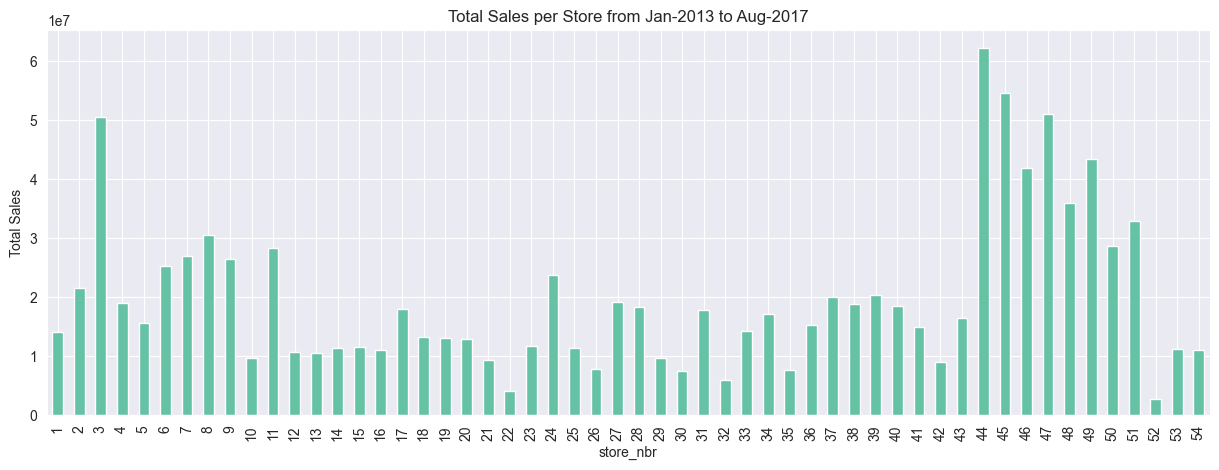

In [123]:
train.groupby("store_nbr")["sales"].sum().plot(kind="bar", figsize=(15, 5))

plt.title("Total Sales per Store from Jan-2013 to Aug-2017")
plt.xtitle("Store Number")
plt.show()


In [166]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [171]:
train_sales = train.groupby("store_nbr")["sales"].sum()

In [190]:
stores_merge = stores.merge(train_sales, left_on="store_nbr", right_index=True)

In [191]:
stores_merge[stores_merge["sales"] > 3*10**7]

,store_nbr,city,state,type,cluster,sales
2,3,Quito,Pichincha,D,8,5.048191e+07
7,8,Quito,Pichincha,D,8,3.049429e+07
43,44,Quito,Pichincha,A,5,6.208755e+07
44,45,Quito,Pichincha,A,11,5.449801e+07
45,46,Quito,Pichincha,A,14,4.189606e+07
46,47,Quito,Pichincha,A,14,5.094831e+07
47,48,Quito,Pichincha,A,14,3.593313e+07
48,49,Quito,Pichincha,A,11,4.342010e+07
50,51,Guayaquil,Guayas,A,17,3.291149e+07


just for note if we dont have transactions data for testind date range. this is can make as confident to dont use the transactions data

<AxesSubplot: xlabel='store_nbr'>

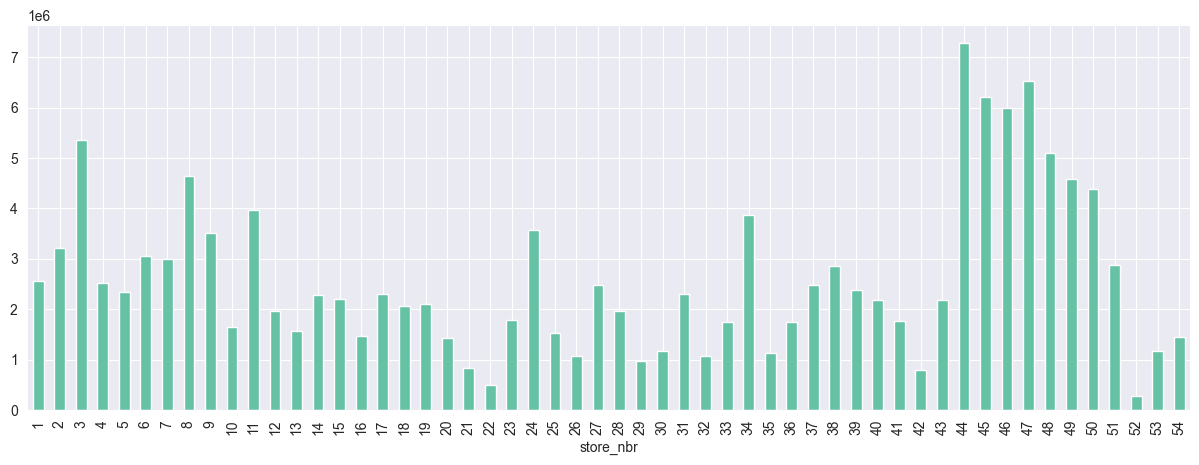

In [179]:
transactions.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

In [ ]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

#### Do analysis by Famiiy

<AxesSubplot: ylabel='family'>

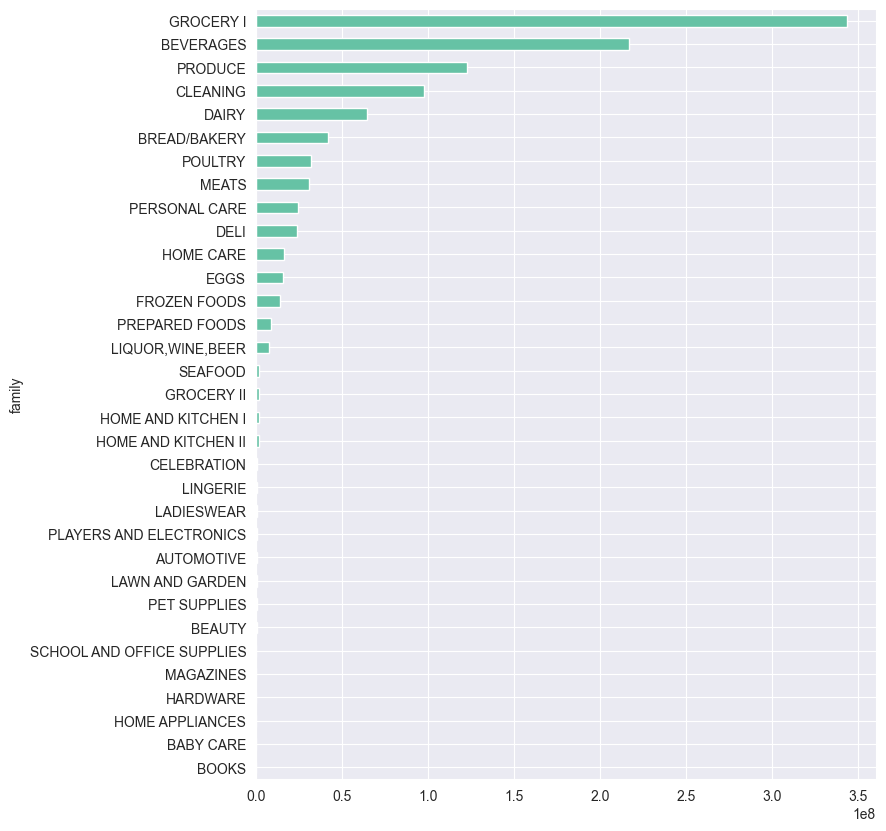

In [199]:
train.groupby("family")["sales"].sum().sort_values().plot(kind="barh", figsize=(8, 10))

#### Do analysis by Time Series

##### Year Sales

In [246]:
train["year"] = train.index.year
train["month"] = train.index.month
train["weekday"] = train.index.weekday
train["day"] = train.index.day
train["quarter"] = train.index.quarter

In [278]:
train["weekday"] = train["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

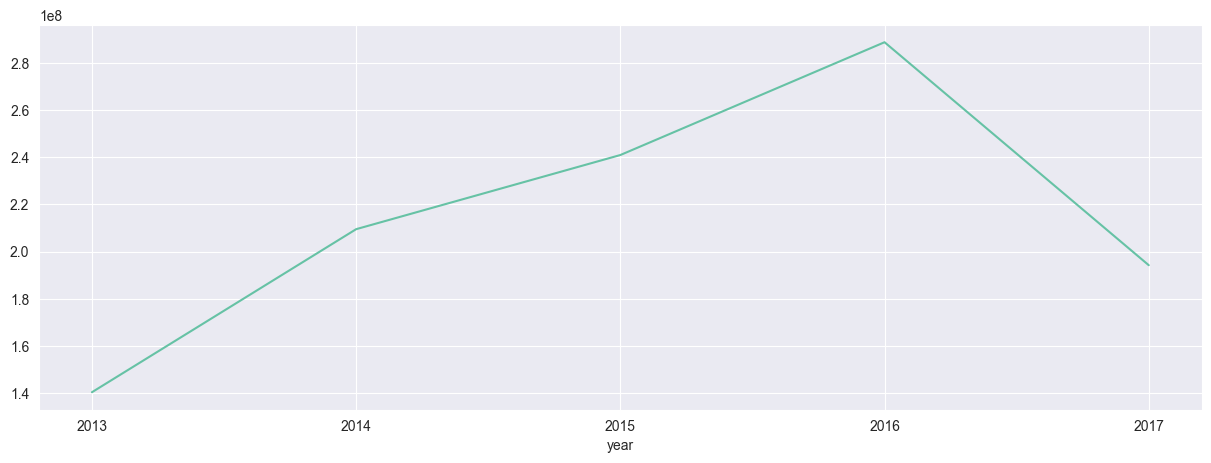

In [251]:
train.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2018, 1))

plt.show()

if we see in 2017 number of sales is decrease because one of the reason is we only have data until august 2017. Then to get good analysis by agregation and visualization comparison we have to drop 2017 data first

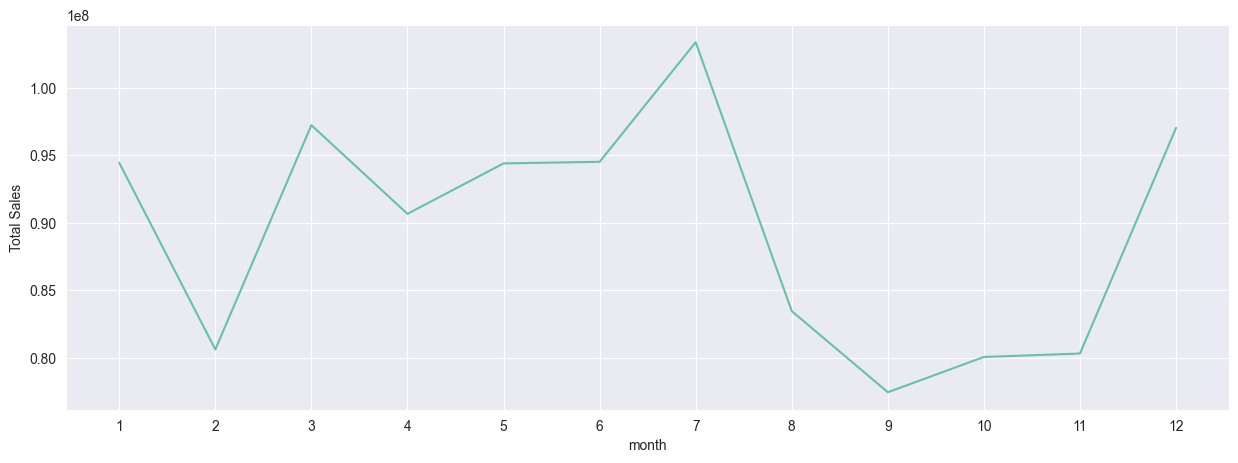

In [ ]:
train.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")
plt.show()

##### Drop 2017 Data

In [280]:
train_viz = train.loc[train["year"] != 2017]

##### Revisualize the data

In [293]:
train_viz.head()

,id,store_nbr,family,sales,onpromotion,year,month,weekday,day,quarter
date,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,Tuesday,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,Tuesday,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,Tuesday,1,1


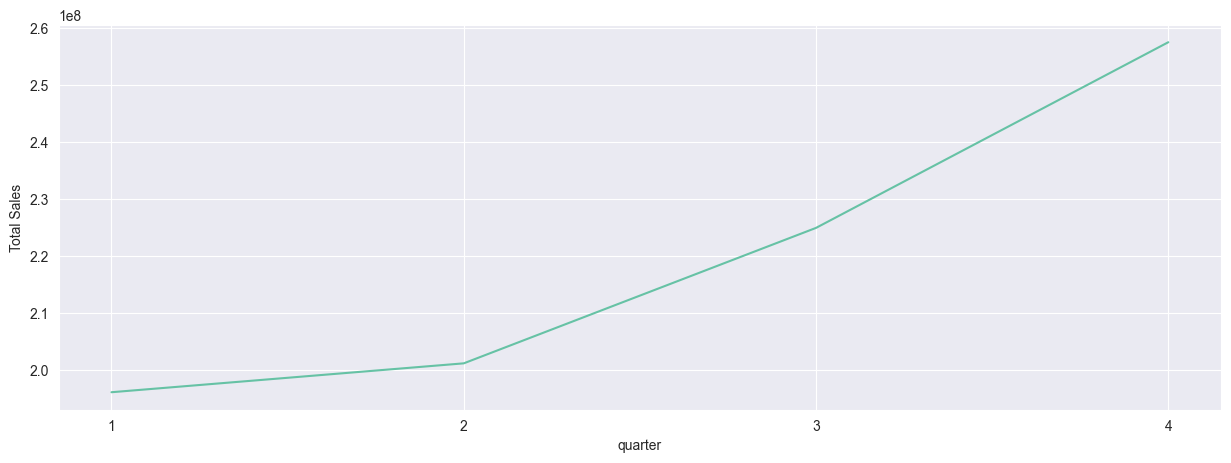

In [296]:
train_viz.groupby("quarter")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 5))                                       
plt.ylabel("Total Sales")

plt.show()

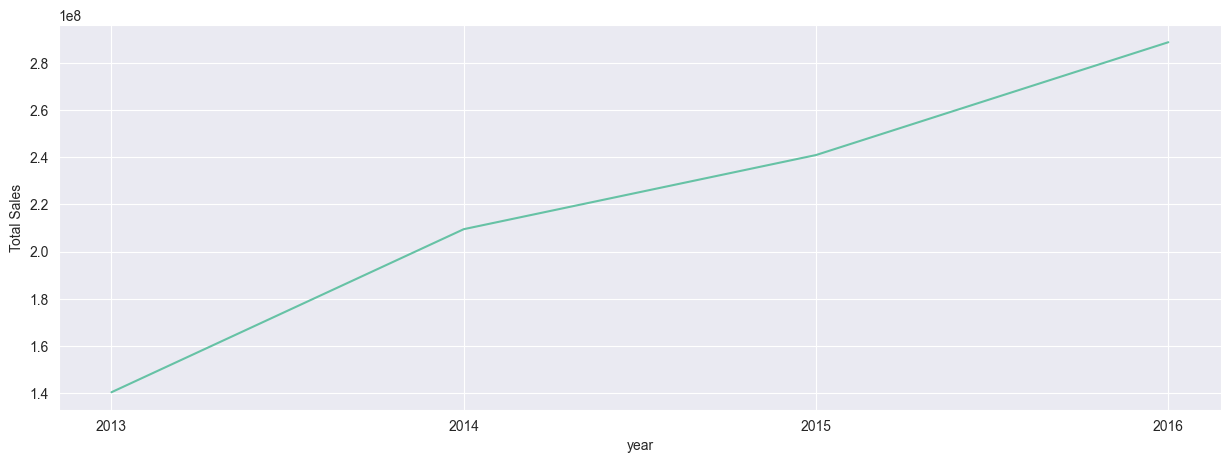

In [291]:
train_viz.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2017, 1))
plt.ylabel("Total Sales")
plt.show()

In [299]:
train_viz.head()

,id,store_nbr,family,sales,onpromotion,year,month,weekday,day,quarter
date,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,Tuesday,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,Tuesday,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,Tuesday,1,1


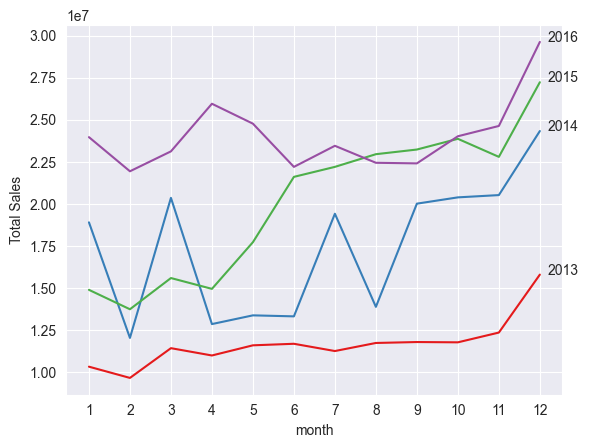

In [327]:
year = train_viz.groupby(["year","month"])["sales"].sum().reset_index()

sns.lineplot(x="month", y="sales", hue="year", data=year, palette="Set1", legend = False)


for year_value in year["year"].unique():
    subset = year[year["year"] == year_value]
    last_point = subset.tail(1)
    plt.annotate(year_value, xy=(last_point["month"].values[0], last_point["sales"].values[0]),
                 xytext=(last_point["month"].values[0] + 0.2, last_point["sales"].values[0]))


plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")


plt.show()

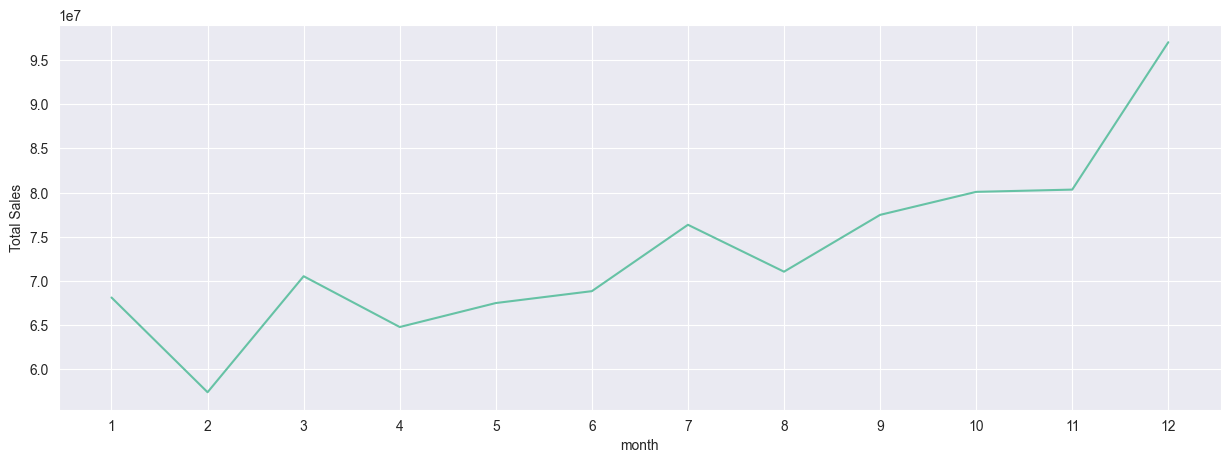

In [290]:
train_viz.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")

plt.show()

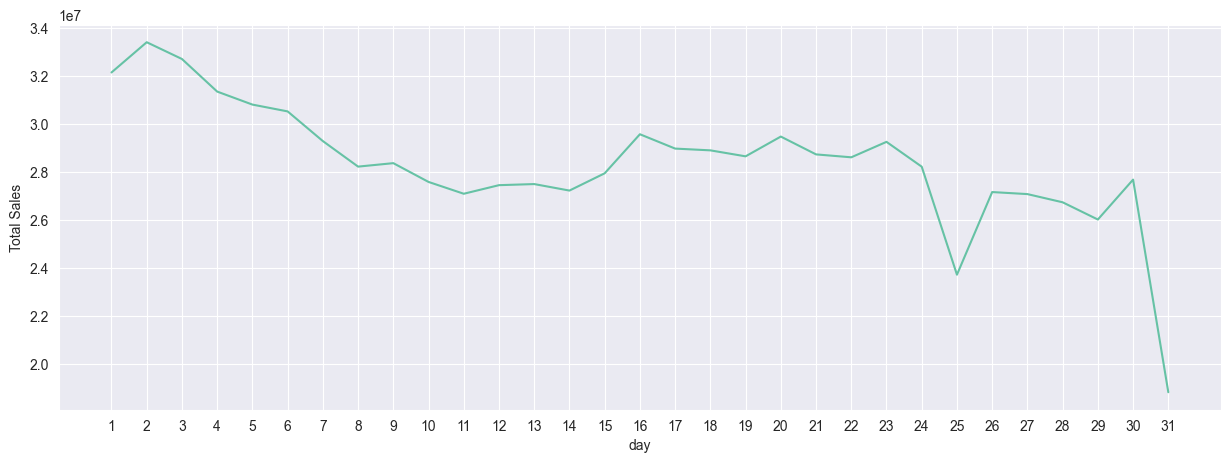

In [294]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")
plt.show()

In [283]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

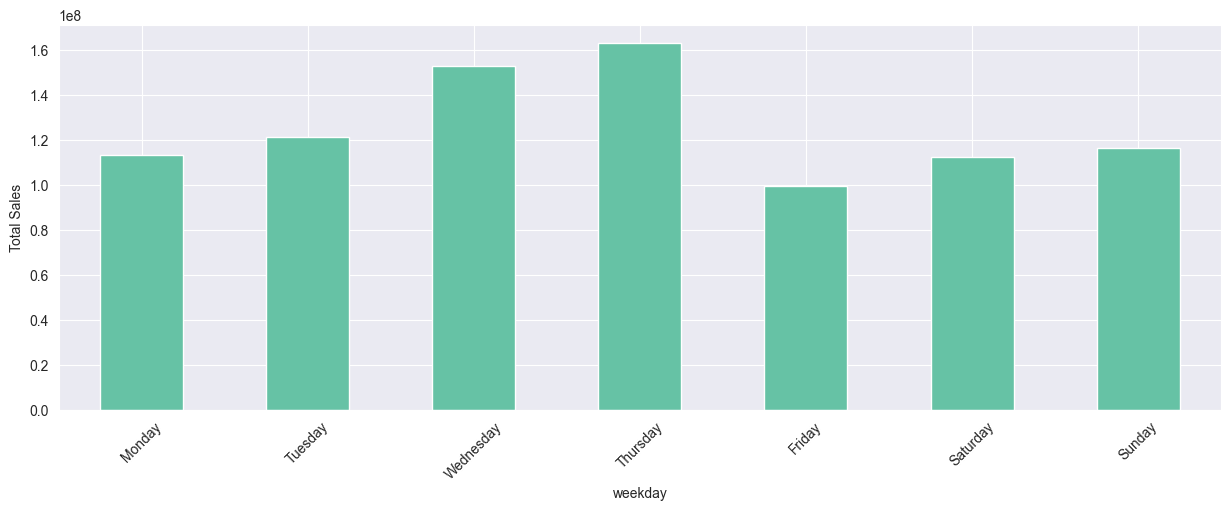

In [308]:
train_viz.groupby("weekday")["sales"].sum().plot(kind="bar", figsize=(15, 5))
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.ylabel("Total Sales")

plt.show()

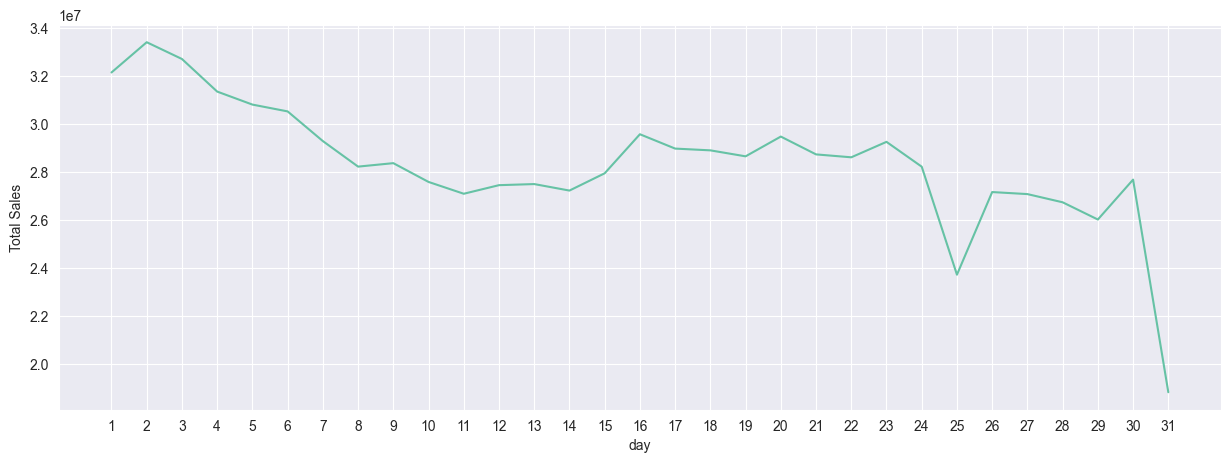

In [272]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")

plt.show()  

#### Do analysis by Holiday

In [276]:
holidays_events.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [713]:
holidays_events["type"].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [716]:
holidays_events["locale"].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [717]:
holidays_events["date"].min(), holidays_events["date"].max()

('2012-03-02', '2017-12-26')

we need to drop some data like 2017 and 2012 data

In [726]:
# we drop the transferred holidays

holidays = holidays_events[holidays_events["transferred"] == False]
holidays = holidays[(holidays["date"] < "2017-01-01") & (holidays["date"] >= "2013-01-01")]


In [727]:
holidays.head()

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False


In [732]:
holidays["date"] = pd.to_datetime(holidays["date"])

holidays.set_index("date", inplace=True)

In [735]:
holidays.loc[holidays.index.duplicated(keep=False)].tail()

,type,locale,locale_name,description,transferred
date,,,,,
2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
2016-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False
2016-12-22,Additional,National,Ecuador,Navidad-3,False
2016-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


if you check there are some date that have 2 holidays in a day like national and local. So we need to drop the local one because already included in national

In [745]:
holidays["year"] = holidays.index.year
holidays["month"] = holidays.index.month
holidays["weekday"] = holidays.index.weekday
holidays["day"] = holidays.index.day

holidays_filtered["weekday"] = holidays_filtered["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [739]:
holidays.drop_duplicates(subset=["locale", "locale_name", "year", "month", "day"], inplace=True)


In [741]:
filtered_index = holidays[(holidays.index.duplicated(keep=False)) & (holidays["locale"] == "National")].index

holidays_filtered = holidays.drop(holidays[(holidays.index.isin(filtered_index)) & ((holidays["locale"] == "Local") | (holidays["locale"] == "Regional"))].index)


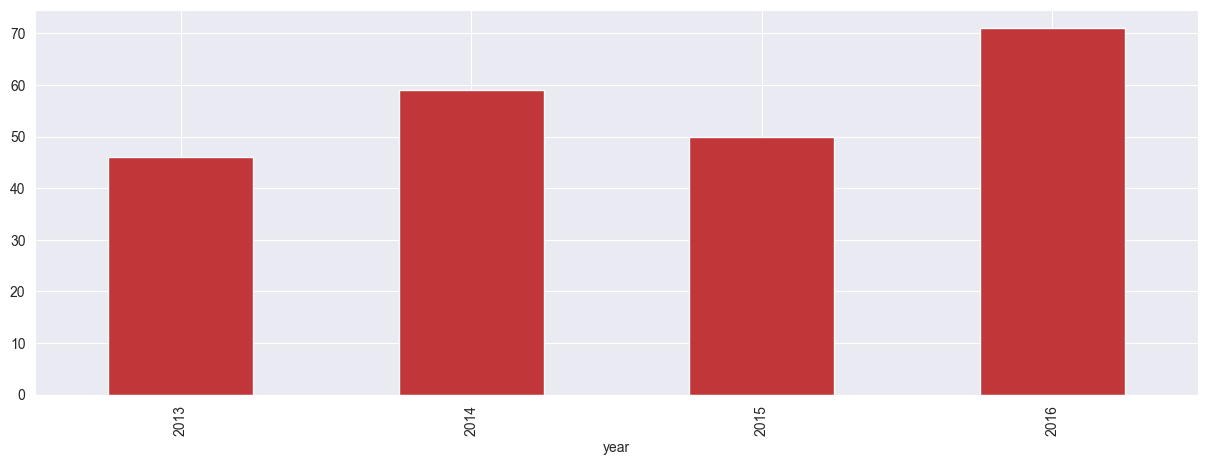

In [742]:
holidays_filtered.groupby("year")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.show()

<AxesSubplot: xlabel='month'>

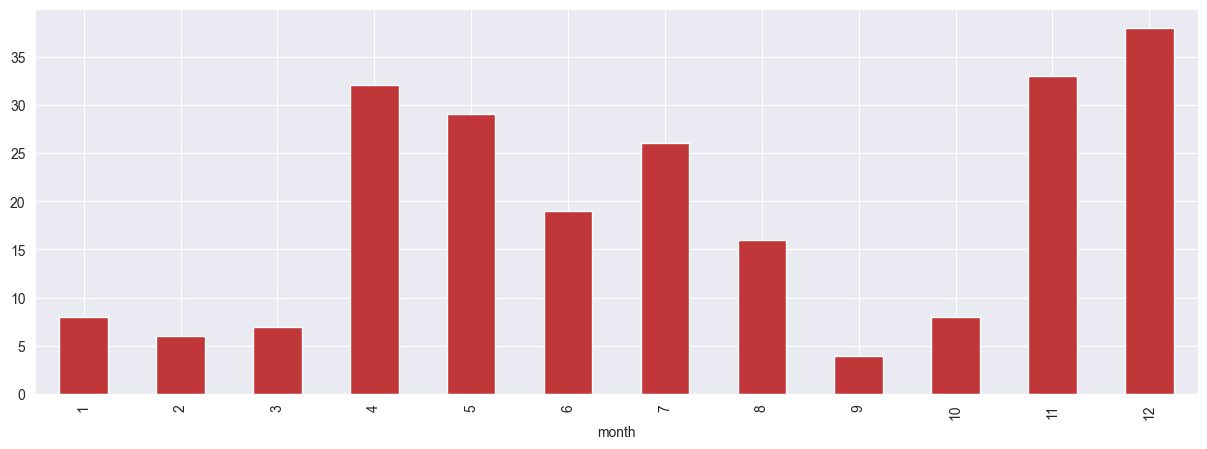

In [743]:
holidays_filtered.groupby("month")["type"].count().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

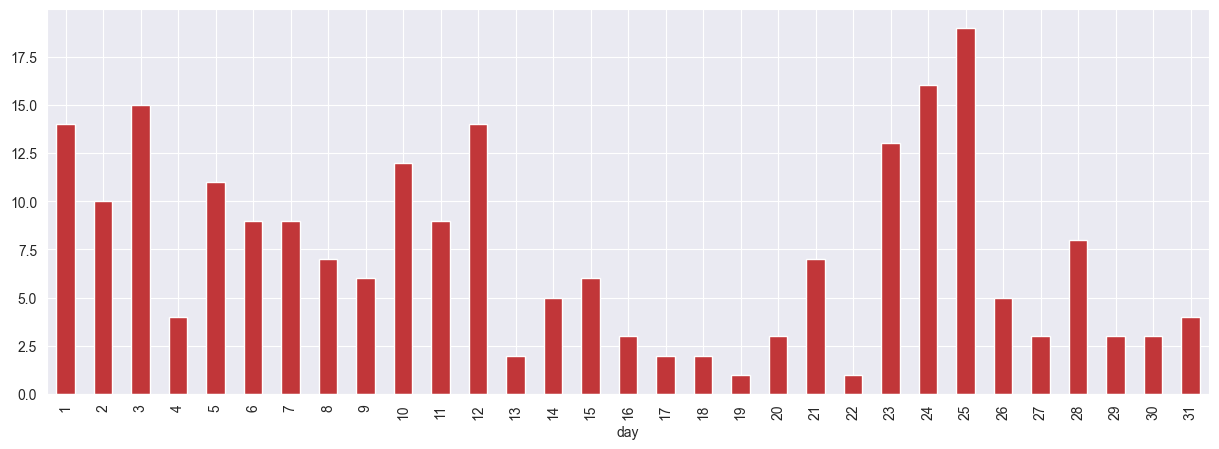

In [744]:
holidays_filtered.groupby("day")["type"].count().plot(kind="bar", figsize=(15, 5))

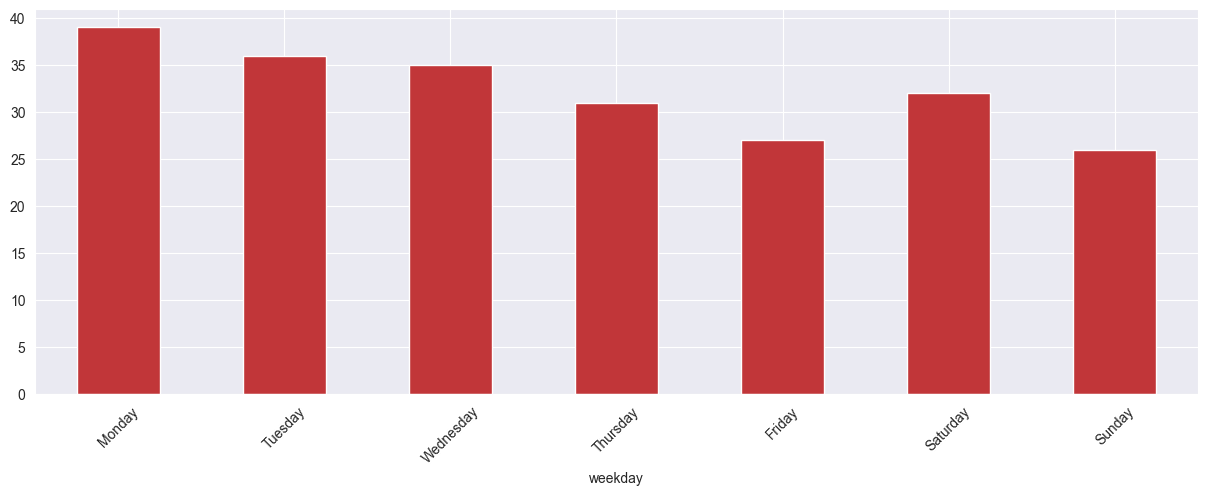

In [746]:
holidays_filtered.groupby("weekday")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.show()

### Do analysis on the oil price

In [388]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [389]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [390]:
oil.fillna(method="ffill", inplace=True)

In [391]:
oil["date"] = pd.to_datetime(oil["date"])
oil.set_index("date", inplace=True)

In [392]:
oil["year"] = oil.index.year
oil["month"] = oil.index.month
oil["day"] = oil.index.day
oil["weekday"] = oil.index.weekday

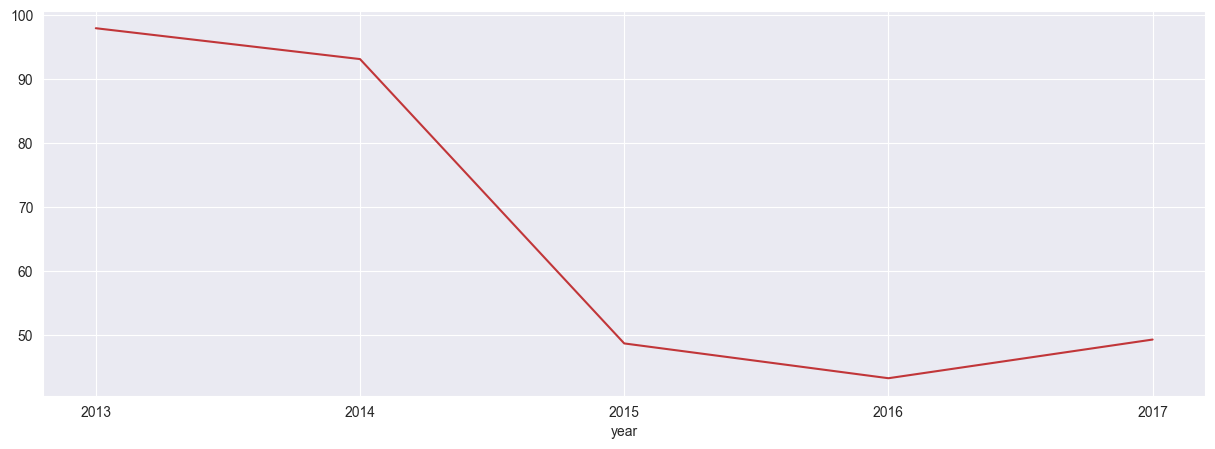

In [400]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2018, 1))

plt.show()

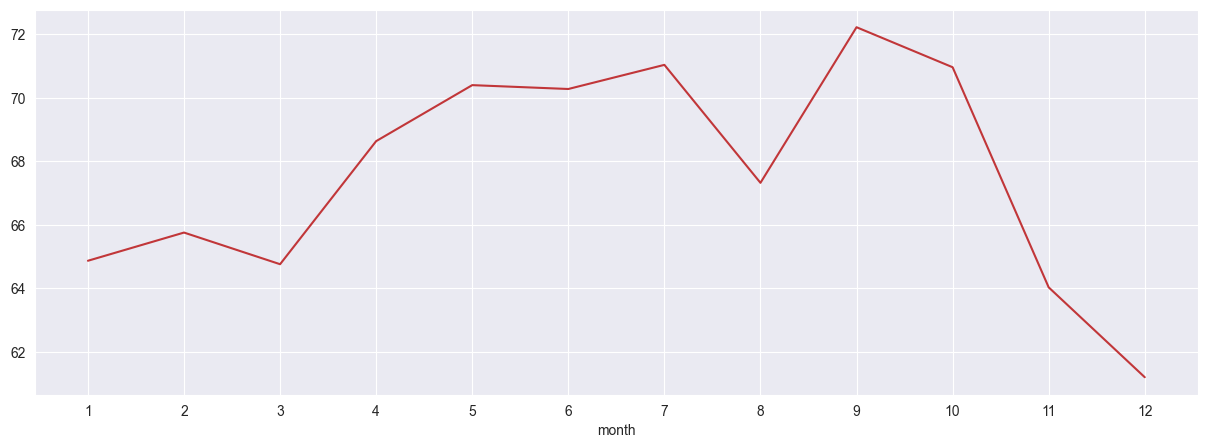

In [399]:
oil.groupby("month")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

### Do analysis on the transactions

In [490]:
transactions["year"] = transactions.index.year
transactions["month"] = transactions.index.month
transactions["day"] = transactions.index.day
transactions["weekday"] = transactions.index.weekday

In [491]:
transactions_viz = transactions.loc[transactions["year"] != 2017]

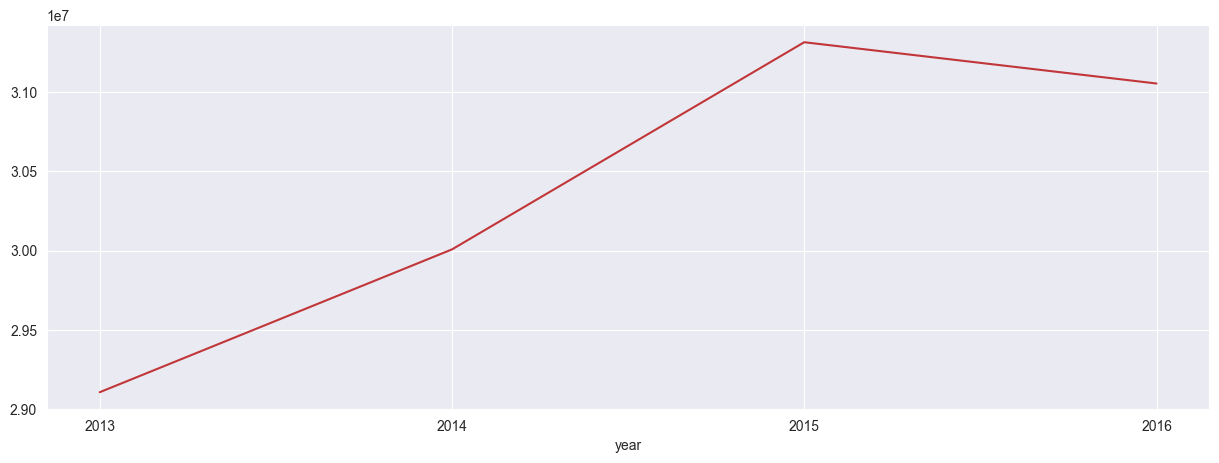

In [492]:
transactions_viz.groupby("year")["transactions"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2017, 1))
plt.show()

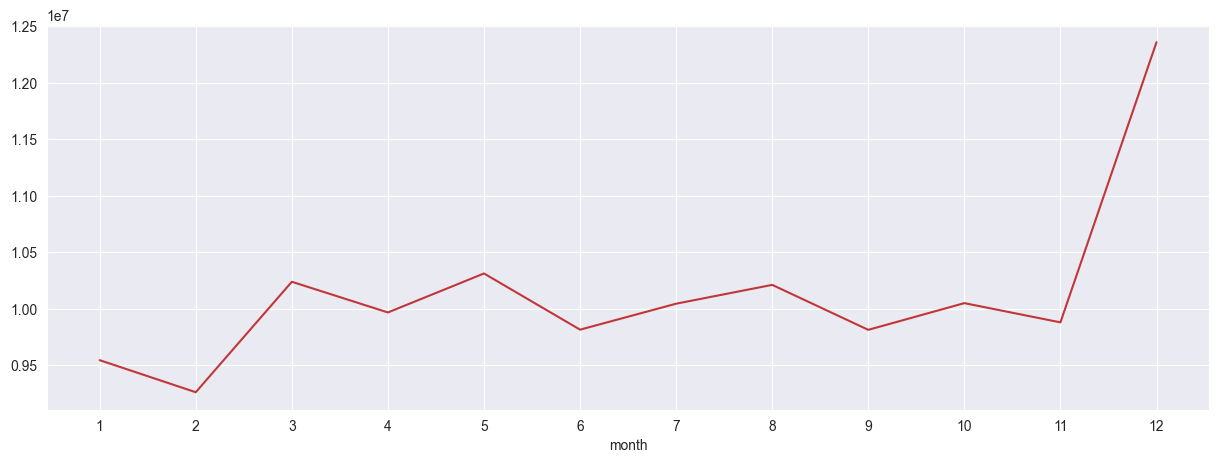

In [493]:
transactions_viz.groupby("month")["transactions"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

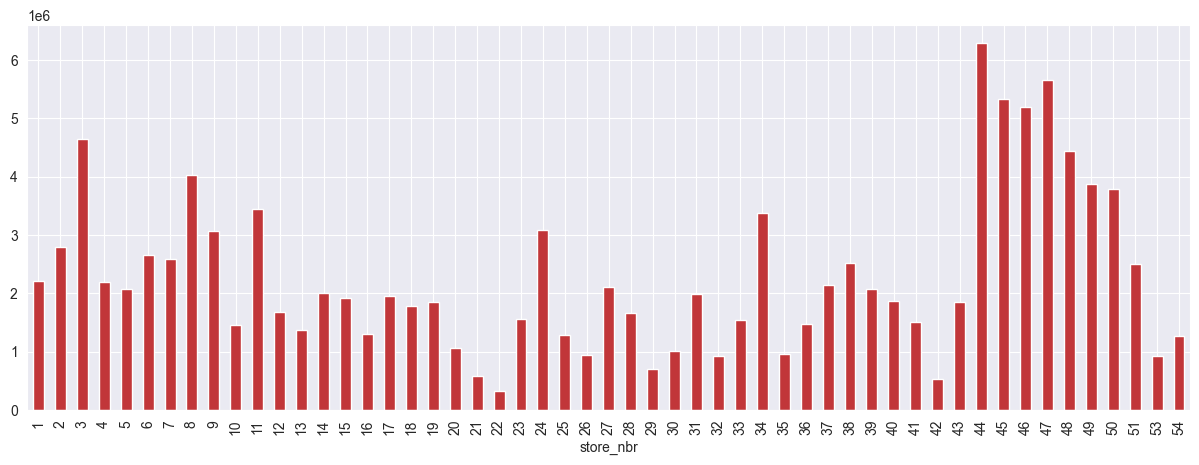

In [494]:
transactions_viz.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

plt.show()

### Combine Dataset and Feature Engineering

we will have two important dataset. First is transactions and stores

In [505]:
transactions_viz.head()

,store_nbr,transactions,year,month,day,weekday
date,,,,,,
2013-01-01,25,770,2013,1,1,1
2013-01-02,1,2111,2013,1,2,2
2013-01-02,2,2358,2013,1,2,2
2013-01-02,3,3487,2013,1,2,2
2013-01-02,4,1922,2013,1,2,2


In [506]:
transactions_store= transactions_viz.merge(stores, on="store_nbr", how="left")

In [507]:
transactions_store.set_index(transactions_viz.index, inplace=True)

In [440]:
sales_store = train_viz.groupby(["date","store_nbr" ])["sales", "onpromotion"].sum().reset_index()

In [441]:
sales_store.head()

,date,store_nbr,sales,onpromotion
0,2013-01-01,1,0.0,0
1,2013-01-01,2,0.0,0
2,2013-01-01,3,0.0,0
3,2013-01-01,4,0.0,0
4,2013-01-01,5,0.0,0


In [509]:
transaction_full= transactions_store.merge(sales_store, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left")

In [513]:
transaction_full.set_index("date", inplace=True)

In [515]:
#aov(average order values)
#aov  = sales/transactions

In [516]:
transaction_full["aov"] = transaction_full["sales"] / transaction_full["transactions"]

<AxesSubplot: xlabel='store_nbr'>

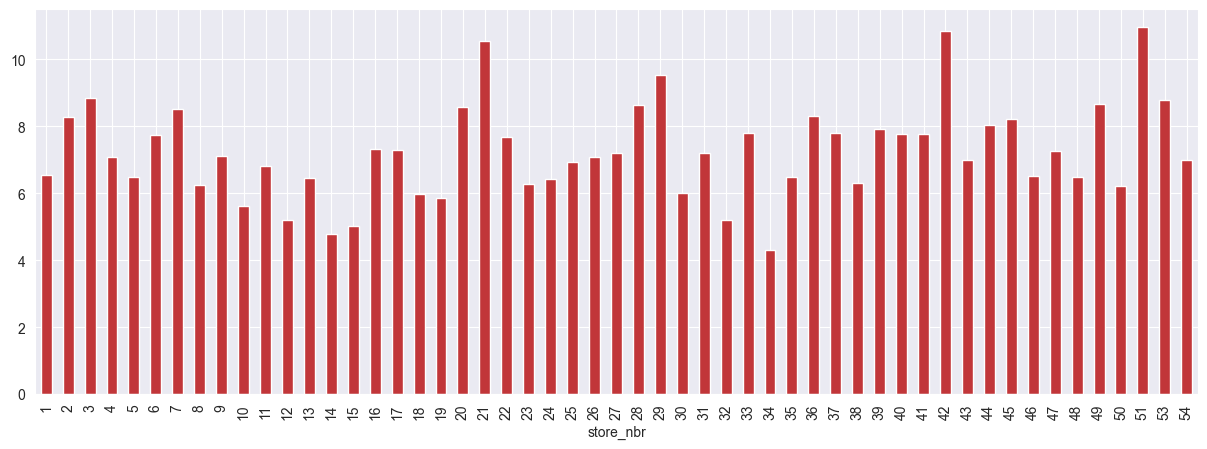

In [518]:
transaction_full.groupby("store_nbr")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

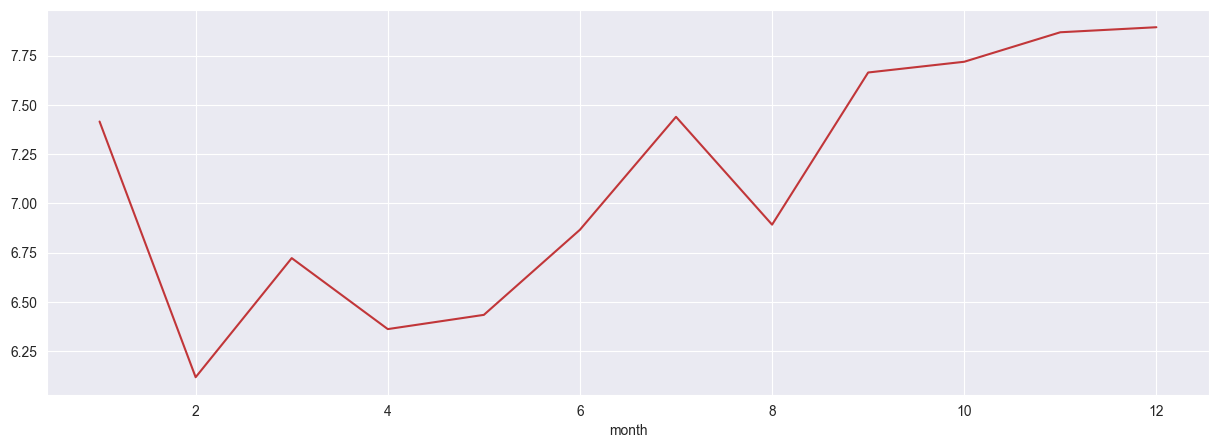

In [779]:
transaction_full.groupby("month")["aov"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

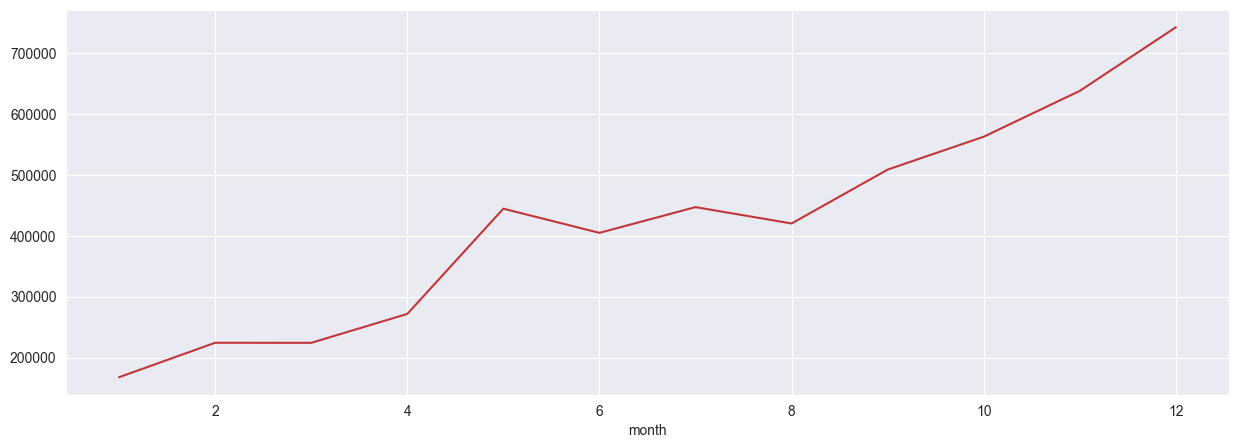

In [786]:
transaction_full.groupby("month")["onpromotion"].sum().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

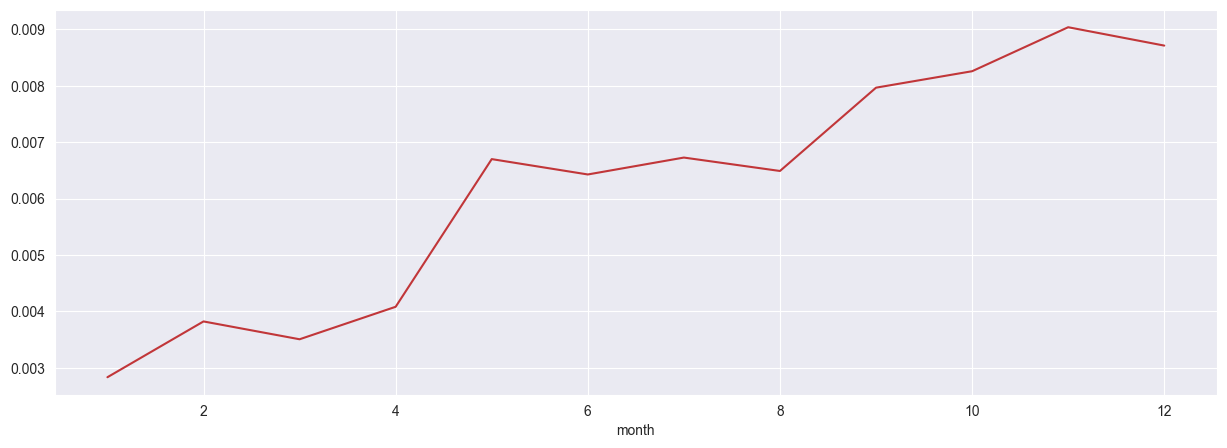

In [783]:
transaction_full.groupby("month")["psr"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

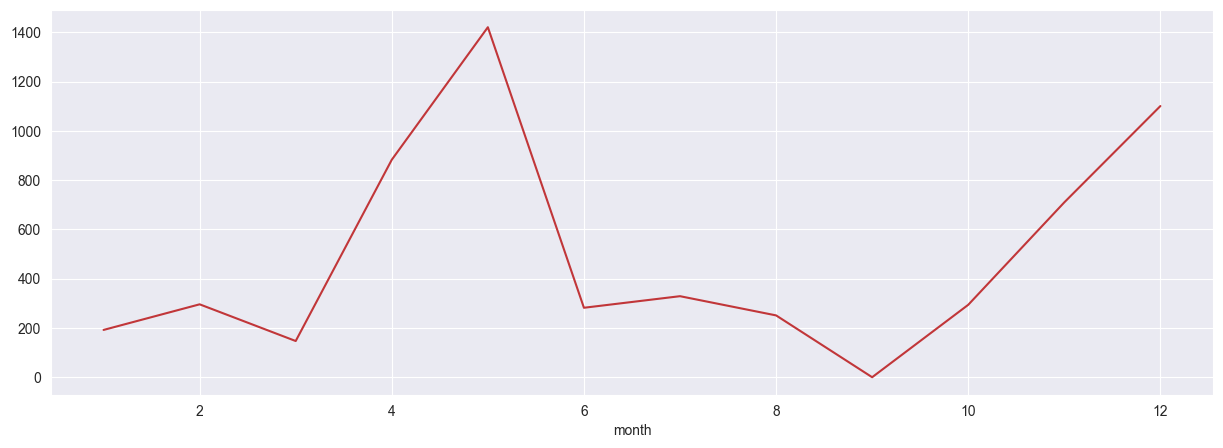

In [787]:
transaction_full.groupby("month")["national_holiday"].sum().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

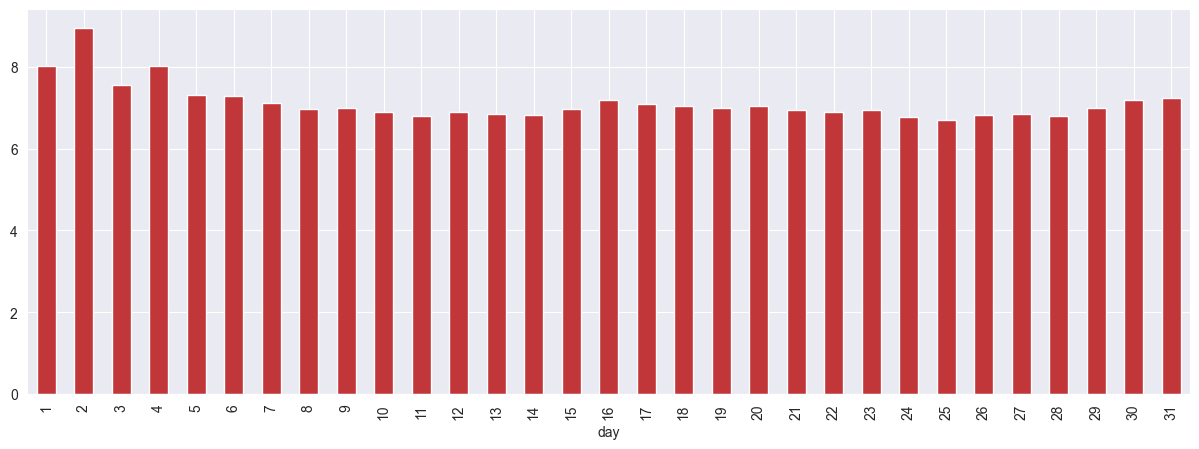

In [781]:
transaction_full.groupby("day")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='year'>

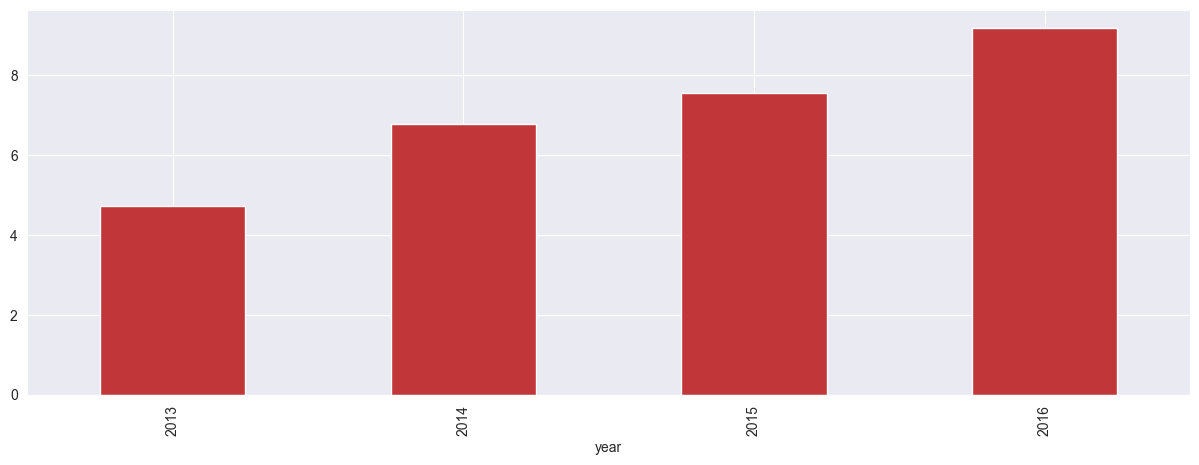

In [519]:
transaction_full.groupby("year")["aov"].mean().plot(kind="bar", figsize=(15, 5))

In [520]:
# promotional_sales_ratio (psr)= promotional_sales(onpromotion) / total_sales

transaction_full["psr"] = transaction_full["onpromotion"] / transaction_full["sales"]

<AxesSubplot: xlabel='store_nbr'>

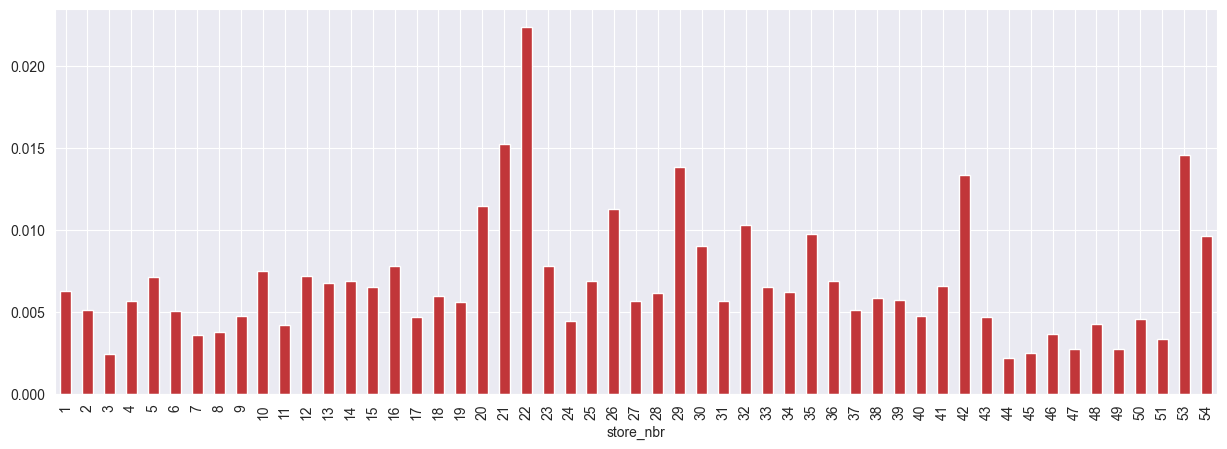

In [521]:
transaction_full.groupby("store_nbr")["psr"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

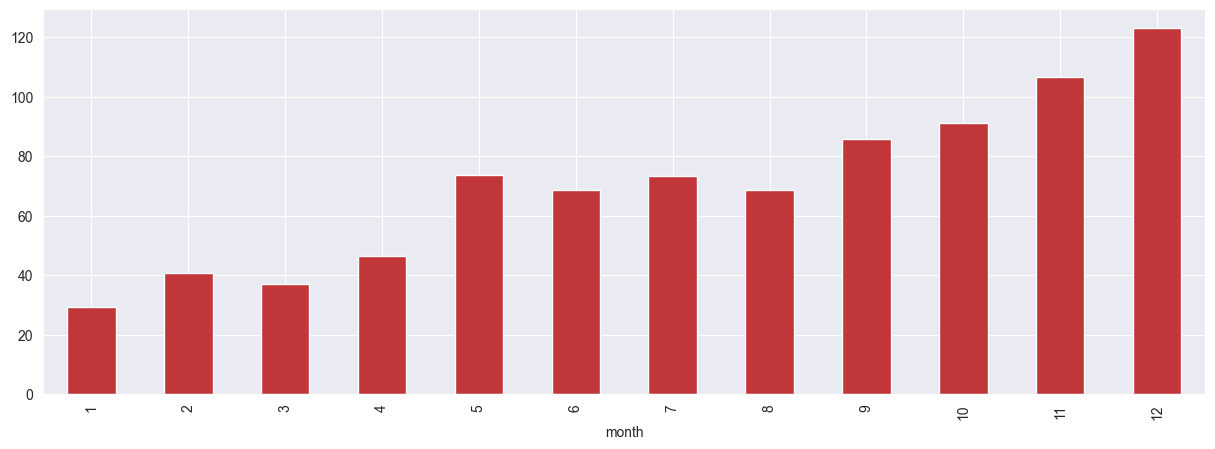

In [526]:
transaction_full.groupby("month")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='store_nbr'>

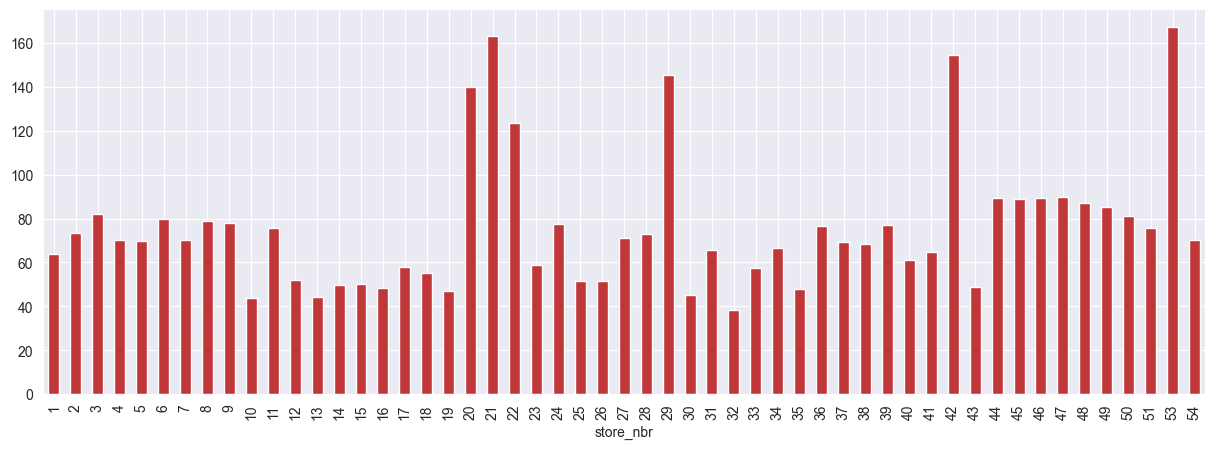

In [523]:
transaction_full.groupby("store_nbr")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

##### add holidays data

In [670]:
local_holidays = holidays_filtered[holidays_filtered["locale"] == "Local"]
regional_holidays = holidays_filtered[holidays_filtered["locale"] == "Regional"]
national_holidays = holidays_filtered[holidays_filtered["locale"] == "National"]

In [748]:
def is_holiday_local(row):
    dummy = local_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'city']].isin(dummy).all():
        return 1
    else:
        return 0

In [750]:
def is_holiday_regional(row):
    dummy = regional_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'state']].isin(dummy).all():
        return 1
    else:
        return 0

In [755]:
transaction_full["local_holiday"] = transaction_full.apply(is_holiday_local, axis=1)
transaction_full["regional_holiday"] = transaction_full.apply(is_holiday_regional, axis=1)

In [756]:
transaction_full["national_holiday"] = transaction_full.index.isin(national_holidays.index)

In [757]:
transaction_full["total_holiday"] = transaction_full["local_holiday"] + transaction_full["regional_holiday"] + transaction_full["national_holiday"]

In [758]:
transaction_full["total_holiday"].value_counts()

0    65485
1     5906
Name: total_holiday, dtype: int64

this mean after we processsed holidays data before. we dont get duplicated holidays

In [759]:
transaction_full.head()

,store_nbr,transactions,year,month,day,weekday,city,state,type,cluster,sales,onpromotion,aov,psr,local_holiday,regional_holiday,national_holiday,total_holiday
date,,,,,,,,,,,,,,,,,,
2013-01-01,25,770,2013,1,1,1,Salinas,Santa Elena,D,1,2511.618999,0,3.261843,0.0,0,0,True,1
2013-01-02,1,2111,2013,1,2,2,Quito,Pichincha,D,13,7417.148000,0,3.513571,0.0,0,0,False,0
2013-01-02,2,2358,2013,1,2,2,Quito,Pichincha,D,13,10266.718981,0,4.353994,0.0,0,0,False,0
2013-01-02,3,3487,2013,1,2,2,Quito,Pichincha,D,8,24060.348000,0,6.900014,0.0,0,0,False,0
2013-01-02,4,1922,2013,1,2,2,Quito,Pichincha,D,9,10200.083980,0,5.307016,0.0,0,0,False,0


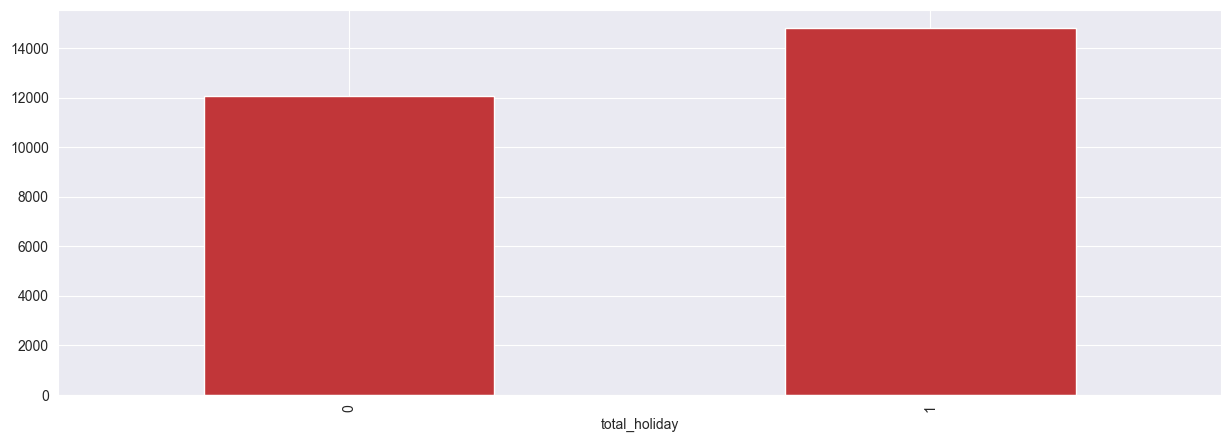

In [789]:
transaction_full.groupby("total_holiday")["sales"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

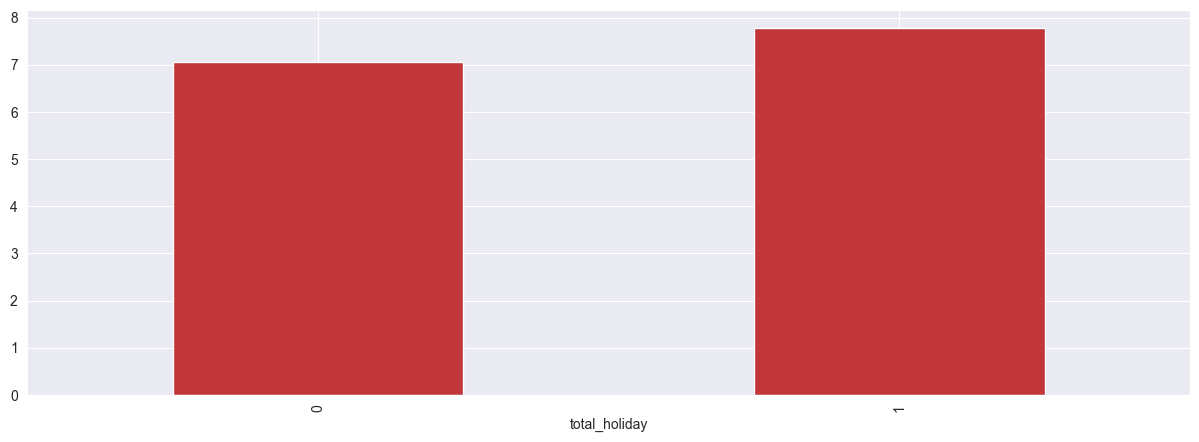

In [790]:
transaction_full.groupby("total_holiday")["aov"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

In [ ]:
transaction_full.groupby("total_holiday")[""].mean().plot(kind="bar", figsize=(15, 5))

### Summary of EDA

#### Based on explatory data we will do some important graph to get insight from the data

<AxesSubplot: xlabel='year'>

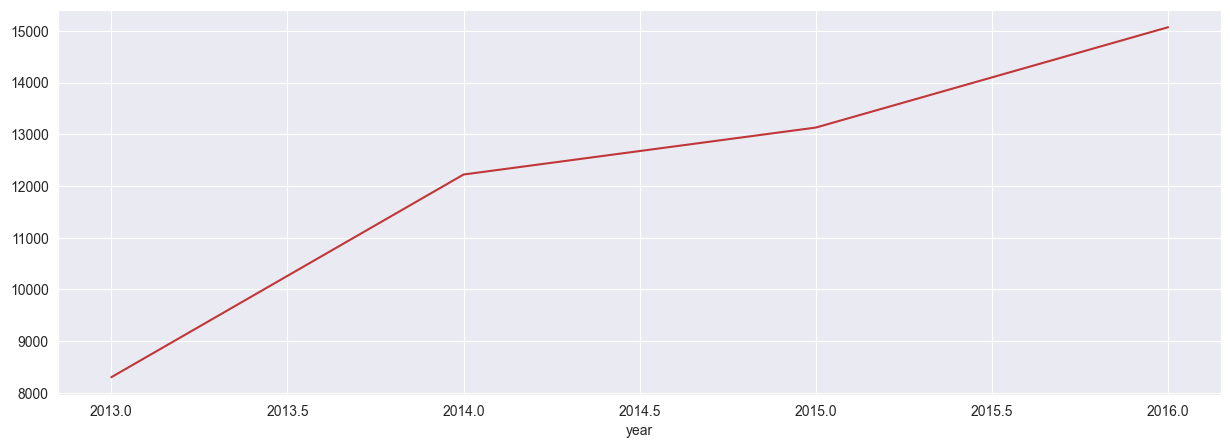

In [794]:
transaction_full.groupby("year")["sales"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='year'>

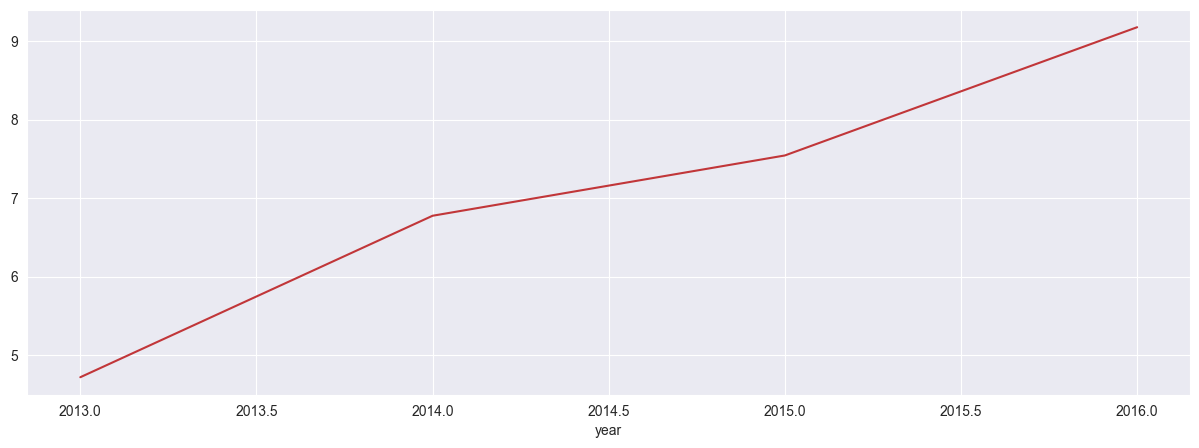

In [799]:
transaction_full.groupby("year")["aov"].mean().plot(kind="line", figsize=(15, 5))

In [800]:
transaction_full.groupby("year")["transaction"].sum().plot(kind="line", figsize=(15, 5))

KeyError: 'Column not found: transaction'

In [801]:
transaction_full.columns

Index(['store_nbr', 'transactions', 'year', 'month', 'day', 'weekday', 'city',
       'state', 'type', 'cluster', 'sales', 'onpromotion', 'aov', 'psr',
       'local_holiday', 'regional_holiday', 'national_holiday',
       'total_holiday'],
      dtype='object')

<AxesSubplot: xlabel='year'>

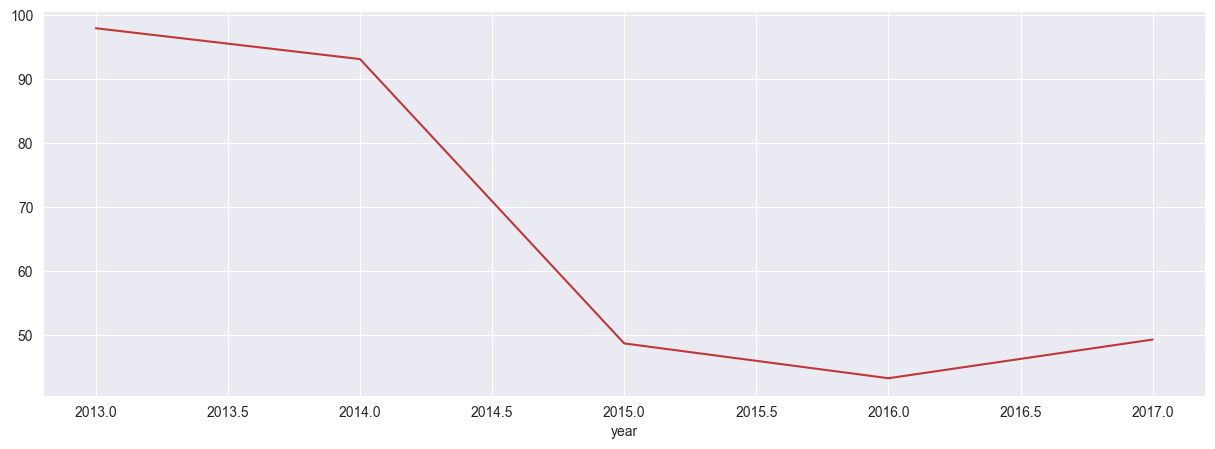

In [797]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='year'>

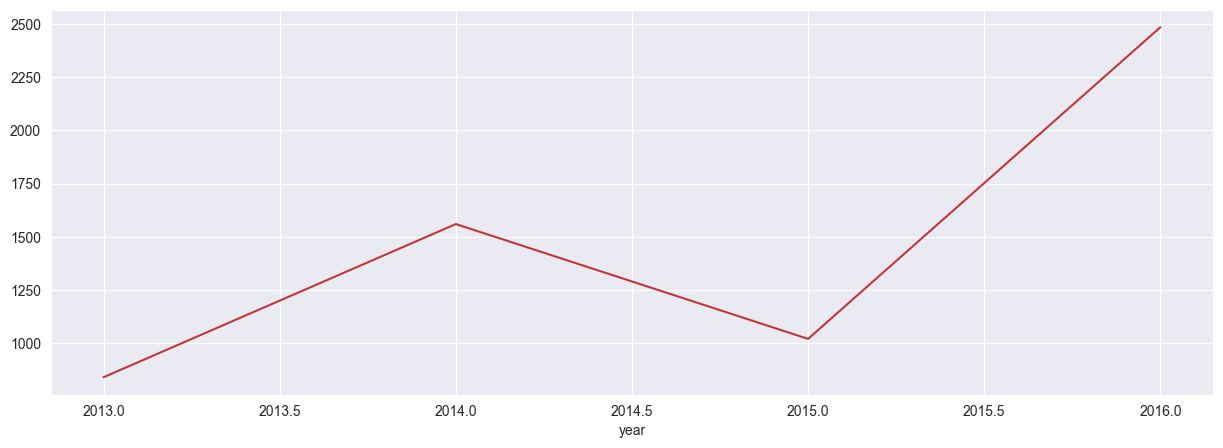

In [798]:
transaction_full.groupby("year")["national_holiday"].sum().plot(kind="line", figsize=(15, 5))